<a href="https://colab.research.google.com/github/olivala/DataMining_Final/blob/main/Milestone5Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sodapy

In [ ]:
#load
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np


# **Milestone 3**



Project Proposal: Chicago Sex Offenders

Data Set: https://data.cityofchicago.org/Public-Safety/Sex-Offenders/vc9r-bqvy/about_data

Introduction: In the United States of America it is required for people who committed sex related crimes to register as sex offenders in order to protect the public. Though sexual assault is often under reported and under charged it is important to keep individuals who have been charged with such crimes away from places like schools. For the public it is easy to access the information of sex offenders in their area to protect themselves and their families. To analyze the demographics of sex offenders I will look into the Sex Offenders database.

Dataset Description and Significance: The sex offenders data set supplied by the city of Chicago includes over three thousand registered sex offenders from Chicago. The data set provides information about their birthday, race, housing status, and if their victim was a minor. By analyzing this data I will uncover trends about the age of the perpetrator and if their victim was a minor.

Story to Tell and Importance: The narrative the analysis will cover is to analyze the age of the individual charged and their victim in order to backup the importance of databases and regulations for sex offenders. To understand how sex based crimes on minors are committed by any group is very important in helping to protect children and keep perpetrators from reoffending.

Deliverables: Data report: I will provide a report on the data and my findings which will include analytics and visualizations. Summary presentation: I will provide a presentation of my findings in a more accessible medium

Resource and Assistance Requirements: For this project I will be using Python along with Pandas and matplotlib. I will also be establishing a Socrata API connection to the data set provided by the chicago dataset portal. If problems arise I will be reaching out to Professor Irakliotis.

Work Schedule: Over the next two weeks I will be working on the project in the mornings before my classes begin at one. Keeping a consistent schedule will keep me on track and motivated to complete each step of this project in a timely manner.

Conclusion: I will be using data mining to see the correlation between sex offenders age and if their victim was a minor using techniques learned throughout class. I will then gather my analysis and provide documentation that makes what I have uncovered accessible to anyone.


In [ ]:
#help from: https://dev.socrata.com/foundry/data.cityofchicago.org/vc9r-bqvy

client = Socrata("data.cityofchicago.org", None)
#default limit is 1000 however over 3.5k cols are in the dataset
results = client.get('vc9r-bqvy',limit=4000)
master_df = pd.DataFrame.from_records(results)

In [ ]:
working_df=master_df.copy(deep='TRUE')
working_df.head()

In [ ]:
working_df.shape

In [ ]:
for column in range(working_df.shape[1]):
  print(working_df[working_df.columns[column]].count())

In [ ]:
#create age col
working_df['birth_date']=pd.to_datetime(working_df['birth_date'])
current_date=datetime.now()
working_df['Age']=(current_date-working_df['birth_date']).astype('<m8[Y]')
working_df.head()

In [ ]:
#only include necessary cols
working_df=working_df[['Age','victim_minor']]

In [ ]:
#convert victim_minor col to binary
working_df['victim_minor']=working_df['victim_minor'].apply(lambda x:1 if x.lower()== 'y' else 0)
working_df.head()

In [ ]:
correlation = working_df['victim_minor'].corr(working_df['Age'])
print(correlation)

The correlation between the age of the perpetrator and if the victim is a minor is -0.06937. This is a weak correlation as it is far away from 1 or -1. However, a negative correlation still signifies that as the age increases the liklihood of the victim being a minor decreases and when the age decreases the liklihood of the victim being a minor increases.

In [ ]:
#function to compare perpetrators over 50 and under 50
def compare(df, age, victim_minor, age_threshold=50):
  age_groups = working_df.groupby(age)['victim_minor'].mean()
  lh_over_50 = age_groups[age_groups.index > age_threshold].mean()
  lh_under_50 = age_groups[age_groups.index <= age_threshold].mean()
  if lh_over_50 > lh_under_50:
    result = 'over_50'
  elif lh_over_50 < lh_under_50:
    result = 'under_50'
  else:
    result = 'equal_likelihood'
  return result

compare_result = compare(working_df,'Age', 'victim_minor', age_threshold=50)
print(compare_result)

After splitting the data into two groups, one for perpetrators over 50 and one for perpetrators under 50 it was deterimined that the liklihood of a victim being a minor is higher for perpetrators over 50. This result is in line with the correlation above.

In [ ]:
def compare(df, age, victim_minor):
  age_bins = [0,25,50,75,float('inf')]
  age_label = ['Under 25','25-50,','50-75','75+']
  working_df['Age']
  df['age_group'] = pd.cut(df[age], bins=age_bins, labels=age_label, right=False)
  age_groups = df.groupby('age_group')[victim_minor].mean()
  ranked = age_groups.sort_values(ascending=False).index.tolist()

  return ranked

ranked_ages = compare(working_df, 'Age', 'victim_minor')
print(ranked_ages)

The age group most likely to commit crimes against minors is people 25-50 years old. The next group is people over 75. Then people under 25. The group least likely to have a minor victim is people from 50-75. This ranking helps to understand why the correlation between age and if a victim is a minor is so weak

In [ ]:
plt.scatter(working_df['Age'],working_df['victim_minor'],alpha=0.5)
plt.title('Correlation between Perpetrator Age and Minor Victim')
plt.xlabel('Perpetrator Age')
plt.ylabel('Minor Victim (1 for Yes, 0 for No)')
plt.show()

In [ ]:
ef plotratio(df, age, victim_minor):
  age_groups=working_df.groupby(age)['victim_minor'].mean()
  ratio=age_groups/(1-age_groups)
  plt.plot(ratio.index,ratio.values,marker='o')
  plt.title('Ratio of Victims Being Minors to Victims Not Being Minors by Age')
  plt.xlabel('Perpetrator Age')
  plt.ylabel('Ratio (Minors / Non-Minors)')
  plt.show()

plotratio(working_df,'Age','victim_minor')

The graph shows the ratio of victims who are minors to victims who are not minors and the age of their perpetrator. The graph displays that younger people tend to commit crimes against minors more often. There is also a high spike in assult againt minors by 81 yearolds. It is also important to note that every age in the graph below 50 has a ratio above 1, meaning that for each age above 50 they commit more assults against minors than non minors.

In [ ]:
corr_matrix=working_df[['Age','victim_minor']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title('Correlation Map between Age of Perpetrator and Minor Victim')
plt.show()



In conclusion, there is not a strong correlation between the age of the perpetrator and if the vicitim is a minor. There is a small trend that perpetrators younger than fifty tend to commit more assults on minors which is backed up by the negative correlation and the line graph. For further reasearch on this topic it would be intresting to look into the correlation between if a victim is a minor and the interaction between gender and age. The data also provides height and weight so it would be intresting to look into if the size of the perpeatrator is correlated with the victim being a minor.

Presentation: https://docs.google.com/presentation/d/16ZlO0PYDYWrwCLiYv0RyeuaDyJ3sc0WgV9AbYMqpGmQ/edit?usp=sharing


# **Milestone 4&5**

I was previously working on the sex offenders data set. This data set did not provide an opportunity to connect another data set do it, so I will now be working on the towed cars data set (https://data.cityofchicago.org/Transportation/Towed-Vehicles/ygr5-vcbg/about_data). My goal is to map a weather data set to the towed vehicles data set to discover if there is a correlation between rainfall and vehicles being towed. I will also look into snowfall. To do this I will create functions that examine the data and visualizations to convey the findings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load in towed data
#code from https://dev.socrata.com/foundry/data.cityofchicago.org/ygr5-vcbg

client = Socrata("data.cityofchicago.org", None)

results = client.get("ygr5-vcbg", limit=4000)

results_df = pd.DataFrame.from_records(results)

In [ ]:
#set working df
working_df=results_df.copy(deep='TRUE')
working_df.head()

,tow_date,make,style,color,plate,state,towed_to_address,tow_facility_phone,inventory_number,model
0,2024-04-29T00:00:00.000,ACUR,LL,SIL,DS70128,IL,701 N. Sacramento,(773) 265-7605,7089744,NaN
1,2024-04-29T00:00:00.000,ACUR,LL,GRY,EG65497,IL,400 E. Lower Wacker,(312) 744-7550,0301945,NaN
2,2024-04-29T00:00:00.000,AUDI,4D,BLK,CY57416,IL,10300 S. Doty,(773) 568-8495,2968597,NaN
3,2024-04-29T00:00:00.000,BMW,LL,BLU,DEB720,MI,701 N. Sacramento,(773) 265-1846,1547336,NaN
4,2024-04-29T00:00:00.000,CHEV,4D,SIL,DH84493,IL,400 E. Lower Wacker,(312) 744-7550,0301943,NaN


In [ ]:
#check cols
for column in range(working_df.shape[1]):
  print(working_df[working_df.columns[column]].count())

3494
3456
3479
3462
2677
3380
3494
3494
3494
183


There are no steps I need to take in dealing with NA values for the dataset as the only column I need is dates which has no missing values

In [ ]:
#seperates the time code from date to create date col
working_df['Date'] = pd.to_datetime(working_df['tow_date'])
working_df['Date'] = working_df['Date'].dt.date
#check
working_df.head()

,tow_date,make,style,color,plate,state,towed_to_address,tow_facility_phone,inventory_number,model,Date
0,2024-04-29T00:00:00.000,ACUR,LL,SIL,DS70128,IL,701 N. Sacramento,(773) 265-7605,7089744,NaN,2024-04-29
1,2024-04-29T00:00:00.000,ACUR,LL,GRY,EG65497,IL,400 E. Lower Wacker,(312) 744-7550,0301945,NaN,2024-04-29
2,2024-04-29T00:00:00.000,AUDI,4D,BLK,CY57416,IL,10300 S. Doty,(773) 568-8495,2968597,NaN,2024-04-29
3,2024-04-29T00:00:00.000,BMW,LL,BLU,DEB720,MI,701 N. Sacramento,(773) 265-1846,1547336,NaN,2024-04-29
4,2024-04-29T00:00:00.000,CHEV,4D,SIL,DH84493,IL,400 E. Lower Wacker,(312) 744-7550,0301943,NaN,2024-04-29


In [ ]:
#could not get the api from https://www.visualcrossing.com/weather/weather-data-services to work
#data is also from there
#data from beyond 2021 was behind a paywall
#load weather data
weather_df = pd.read_csv('/content/Chicago,United States 2021-07-06 to 2024-03-31.csv')
weather_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Chicago,United States",2021-07-06,90.9,77.1,83.6,92.6,77.1,85.2,66.6,57.6,...,12.7,8,NaN,2021-07-06T05:22:18,2021-07-06T20:28:13,0.89,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
1,"Chicago,United States",2021-07-07,88.9,69.6,79.0,89.9,69.6,79.6,65.7,65.4,...,8.2,5,NaN,2021-07-07T05:22:58,2021-07-07T20:27:52,0.92,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
2,"Chicago,United States",2021-07-08,68.9,64.1,66.1,68.9,64.1,66.1,58.5,76.7,...,2.2,1,NaN,2021-07-08T05:23:38,2021-07-08T20:27:29,0.96,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,AP878,C8740,KORD,KMDW,72530094846,..."
3,"Chicago,United States",2021-07-09,75.6,59.5,68.2,75.6,59.5,68.2,50.5,56.2,...,11.7,7,NaN,2021-07-09T05:24:20,2021-07-09T20:27:04,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
4,"Chicago,United States",2021-07-10,74.8,64.6,69.4,74.8,64.6,69.4,60.4,73.5,...,9.0,6,NaN,2021-07-10T05:25:03,2021-07-10T20:26:37,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,AP878,C8740,KORD,KMDW,72530094846,..."


In [ ]:
#pd date
working_df['Date'] = pd.to_datetime(working_df['Date'])
working_df['Date_Only'] = working_df['Date'].dt.date
#set the working df to have the same date range and the weather df
start_date = pd.Timestamp('2021-07-06')
end_date = pd.Timestamp('2024-03-31')
working_df = working_df[(working_df['Date'] >= start_date) & (working_df['Date'] <= end_date)]

In [ ]:
#map the two dataframes together using
weather_df.rename(columns={'datetime': 'Date'}, inplace=True)
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
merged_df = pd.merge(working_df, weather_df, on='Date', how='left')

In [ ]:
#create a column that specifies if it rained(or snowed) that day or not
merged_df['rain'] = merged_df['precip'].apply(lambda x: 'Yes' if x > 0 else 'No')
merged_df['snow2'] = merged_df['snow'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [ ]:
#check cols
print(merged_df.columns)

Index(['tow_date', 'make', 'style', 'color', 'plate', 'state',
       'towed_to_address', 'tow_facility_phone', 'inventory_number', 'model',
       'Date', 'Date_Only', 'name', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'rain', 'snow2'],
      dtype='object')


In [ ]:
#simplify cols
merged_df=merged_df[['plate','Date','rain','snow2',"precip","snow"]]

In [ ]:
def count_rain(df):
  count = df.groupby('rain').size().reset_index(name='Towed Cars Count')
  print(count)

count_rain(merged_df)

  rain  Towed Cars Count
0   No              1350
1  Yes               595


More cars were towed on days without rain compared to days with rain. This does not account for the amount of rainy days vs the amount of non rainy days so there needs to be a further examination of the data.

In [ ]:
def percentage_rainy(df):
  unique_dates=df.drop_duplicates('Date')
  rainy_days=unique_dates[unique_dates['rain']=='Yes']
  rainy_days_count=len(rainy_days)
  days=len(unique_dates)
  percentage_rainy=(rainy_days_count/days)*100
  return percentage_rainy

percentage = percentage_rainy(merged_df)
print("Percentage of individual rainy days:", percentage)

Percentage of individual rainy days: 30.64516129032258


The function percentage_rainy goes through the data and finds the percentage of days that there was rain where a car was also towed. The percentage of rainy days in the data is 36.23%.

In [ ]:
def percentage_snowy(df):
  unique_dates=df.drop_duplicates('Date')
  snowy_days=unique_dates[unique_dates['snow2']=='Yes']
  snowy_days_count=len(snowy_days)
  days=len(unique_dates)
  percentage_snowy=(snowy_days_count/days)*100
  return percentage_snowy

percentage2 = percentage_snowy(merged_df)
print("Percentage of individual snowy days:", percentage2)

Percentage of individual snowy days: 8.064516129032258


The rain column in the data frame also includes if it has snowed or not. To look at just the snow, the snow2 column is used. The function percentage_snowy goes through the data and finds the percentage of days that there was snow and at least one car was towed.   The percentage of snowy days is 10.14%.

In [ ]:
def percentage_rainonly(df):
    unique_dates = df.drop_duplicates('Date')
    rainy_days = unique_dates[(unique_dates['rain'] == 'Yes') & (unique_dates['snow2'] == 'No')]
    rainy_days_count = len(rainy_days)
    days = len(unique_dates)
    percentage_rainyonly = (rainy_days_count / days) * 100
    return percentage_rainyonly

percentage3 = percentage_rainonly(merged_df)
print("Percentage of individual rainy days (without snow):", percentage3)

Percentage of individual rainy days (without snow): 22.58064516129032


The function percentage_rainonly goes through the data and counts the cases where there was precipitation that day but there was no snow. 23.09% of the day's at least one car was towed also had rain but no snow.

In [ ]:
#create a df that has the count of cars towed for every day
merged_df2 = merged_df.groupby('Date').agg({'rain': 'first', 'Date': 'size'}).rename(columns={'Date': 'num_towed'}).reset_index()
merged_df3 = merged_df.groupby('Date').agg({'snow2': 'first', 'Date': 'size'}).rename(columns={'Date': 'num_towed'}).reset_index()
merged_df['precipitation'] = (merged_df['rain'] == 'Yes') | (merged_df['snow2'] == 'Yes')
nopercip = merged_df[merged_df['precipitation'] == False].groupby('Date').agg({'rain': 'first', 'Date': 'size'}).rename(columns={'Date': 'num_towed'}).reset_index()
nosnow = merged_df[(merged_df['rain'] == 'Yes') & (merged_df['snow2'] == 'No')].groupby('Date').agg({'rain': 'first', 'Date': 'size'}).rename(columns={'Date': 'num_towed'}).reset_index()
merged_df4 = pd.concat([nopercip, nosnow])

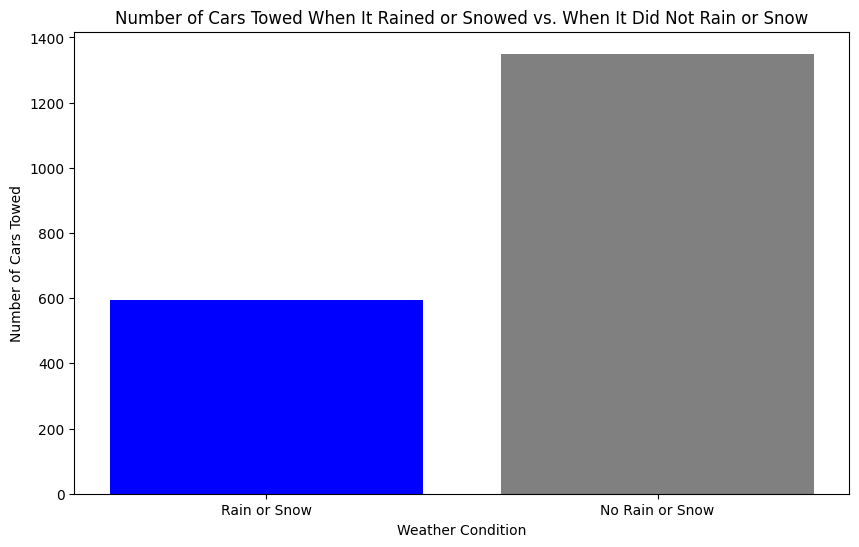

In [ ]:
#vis for rainy and snowy vs non rainy days
merged_df2['Date'] = pd.to_datetime(merged_df2['Date'])
grouped_df = merged_df2.groupby(['Date', 'rain']).agg({'num_towed': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
events_when_rain = grouped_df[grouped_df['rain'] == 'Yes']['num_towed'].sum()
events_when_no_rain = grouped_df[grouped_df['rain'] == 'No']['num_towed'].sum()
plt.bar(['Rain or Snow', 'No Rain or Snow'], [events_when_rain, events_when_no_rain], color=['blue', 'grey'])
plt.title('Number of Cars Towed When It Rained or Snowed vs. When It Did Not Rain or Snow')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Cars Towed')
plt.show()

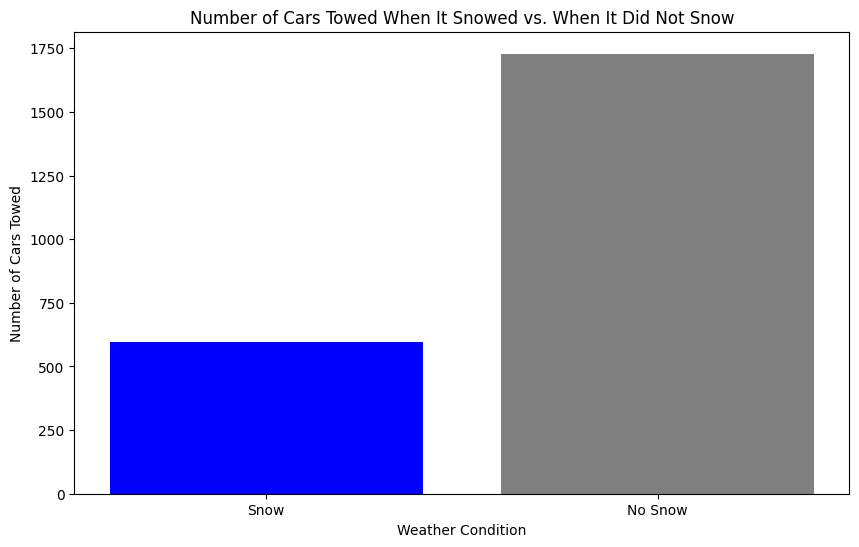

In [ ]:
#vis for snowy vs non snowy days
merged_df3['Date'] = pd.to_datetime(merged_df3['Date'])
grouped_df = merged_df3.groupby(['Date', 'snow2']).agg({'num_towed': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
events_when_snow = grouped_df[grouped_df['snow2'] == 'Yes']['num_towed'].sum()
events_when_no_snow = grouped_df[grouped_df['snow2'] == 'No']['num_towed'].sum()
plt.bar(['Snow', 'No Snow'], [events_when_rain, events_when_no_snow], color=['blue', 'grey'])
plt.title('Number of Cars Towed When It Snowed vs. When It Did Not Snow')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Cars Towed')
plt.show()

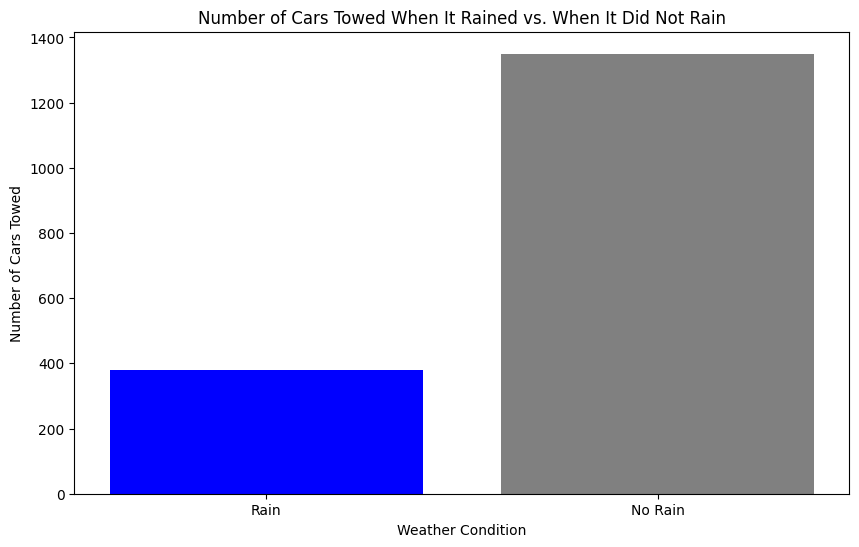

In [ ]:
#vis for rainy vs non rainy days
merged_df4['Date'] = pd.to_datetime(merged_df4['Date'])
grouped_df = merged_df4.groupby(['Date', 'rain']).agg({'num_towed': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
events_when_rain = grouped_df[grouped_df['rain'] == 'Yes']['num_towed'].sum()
events_when_no_rain = grouped_df[grouped_df['rain'] == 'No']['num_towed'].sum()
plt.bar(['Rain', 'No Rain'], [events_when_rain, events_when_no_rain], color=['blue', 'grey'])
plt.title('Number of Cars Towed When It Rained vs. When It Did Not Rain')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Cars Towed')
plt.show()

The three graphs above count the number of cars towed when the event occured and when the event did not occur. Unlike the previous functions which only counted the number of induvidual days which the even occured the graphs also account for the fact that multiple cars can be towed on the same day. From all three graphs we can see that more cars were towed on days were the event did not occur. The graphs also reveal that even through there is a smaller percentage of days where it was snowy vs when it was rainy, more cars were towed on days where it was snowy compared to days wher it was rainy.

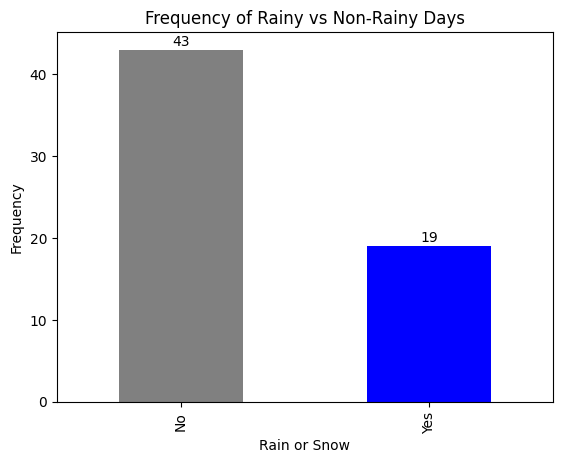

In [ ]:
#vis for rainy days
rain_count = merged_df2['rain'].value_counts()
rain_count.plot(kind='bar', color=['grey', 'blue'])
plt.xlabel('Rain or Snow')
plt.ylabel('Frequency')
plt.title('Frequency of Rainy vs Non-Rainy Days')
for i in range(len(rain_count)):
    plt.text(i, rain_count[i] + 0.5, rain_count[i], ha='center')
plt.show()

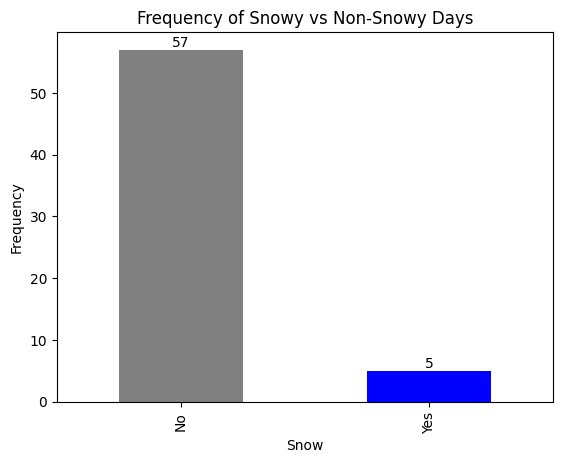

In [ ]:
#vis for snowy days
rain_count = merged_df3['snow2'].value_counts()
rain_count.plot(kind='bar', color=['grey', 'blue'])
plt.xlabel('Snow')
plt.ylabel('Frequency')
plt.title('Frequency of Snowy vs Non-Snowy Days')
for i in range(len(rain_count)):
    plt.text(i, rain_count[i] + 0.5, rain_count[i], ha='center')
plt.show()

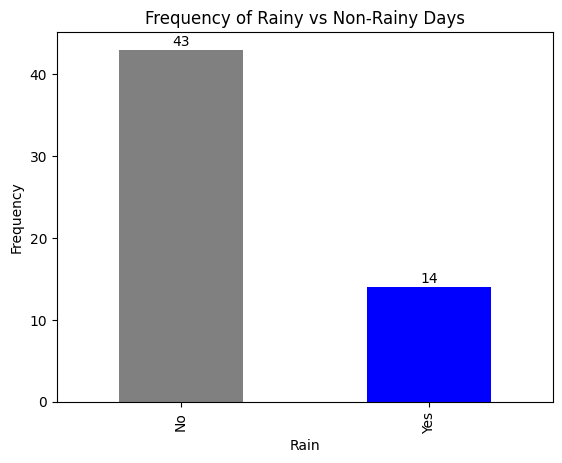

In [ ]:
#vis for rainy days
rain_count = merged_df4['rain'].value_counts()
rain_count.plot(kind='bar', color=['grey', 'blue'])
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.title('Frequency of Rainy vs Non-Rainy Days')
for i in range(len(rain_count)):
    plt.text(i, rain_count[i] + 0.5, rain_count[i], ha='center')
plt.show()

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Month'] = merged_df['Date'].dt.month
month_counts = merged_df['Month'].value_counts()
most_common_month = month_counts.idxmax()
most_common_month_name = pd.to_datetime(str(most_common_month), format='%m').strftime('%B')
print("The month that appears the most in the df is:", most_common_month_name)

The month that appears the most in the df is: March


The code above finds the month that had the most cars towed. The month that had the most cars towed was March

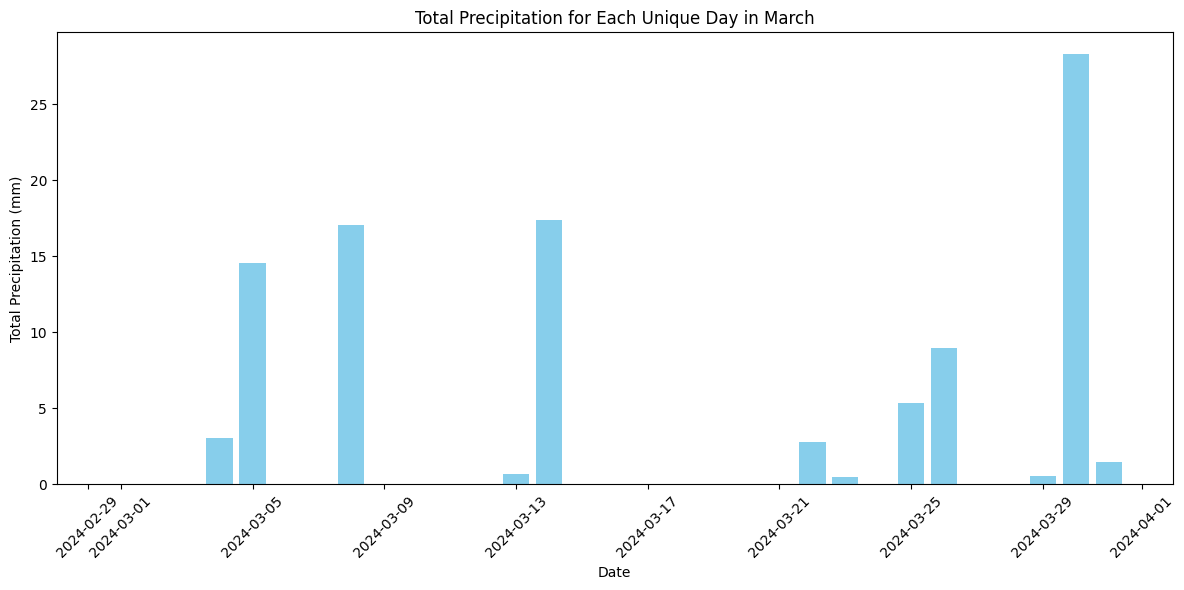

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
march_data = merged_df[(merged_df['Date'].dt.month == 3)]
daily_precipitation = march_data.groupby(merged_df['Date'].dt.date)['precip'].sum()
plt.figure(figsize=(12, 6))
plt.bar(daily_precipitation.index, daily_precipitation.values, color='skyblue')
plt.title('Total Precipitation for Each Day in March')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The figure above shows the percipatation in mm for every day a car was towed in March, 2024

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Month'] = merged_df['Date'].dt.month
month_counts = merged_df['Month'].value_counts()
least_common_month = month_counts.idxmin()
least_common_month_name = pd.to_datetime(str(least_common_month), format='%m').strftime('%B')
print("The month that appears the least is:", least_common_month_name)

The month that appears the least is: January


The code above finds the month that had the least cars towed. The month that had the least cars towed was January.

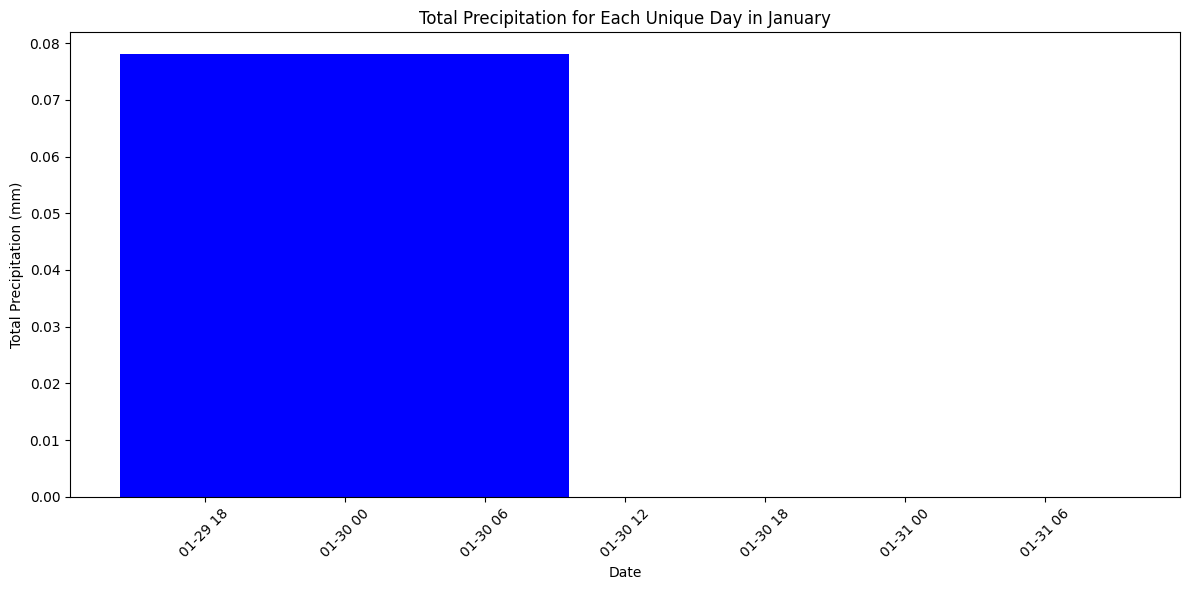

In [ ]:
january_data = merged_df[(merged_df['Date'].dt.month == 1)]
if 'precip' in january_data.columns:
    daily_data = january_data.groupby(january_data['Date'].dt.date)['precip'].sum()
    ylabel = 'Total Precipitation (mm)'
else:
    print("NA")
    sys.exit()
plt.figure(figsize=(12, 6))
plt.bar(daily_data.index, daily_data.values, color='blue')
plt.title('Total Precipitation for Each Unique Day in January')
plt.xlabel('Date')
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
unique_dates_weather = set(weather_df['Date'].dt.date.unique())
unique_dates_merged = set(merged_df['Date'].dt.date.unique())
missing_dates = sorted(unique_dates_weather - unique_dates_merged)
missing_dates_df = pd.DataFrame(missing_dates, columns=['Date'])
missing_weather_data = weather_df[weather_df['Date'].dt.date.isin(missing_dates)]
missing_dates_df['Date'] = pd.to_datetime(missing_dates_df['Date'])
missing_data_with_weather = pd.concat([missing_dates_df.set_index('Date'), missing_weather_data.set_index('Date')], axis=1, join='outer').reset_index()
print("DataFrame of days in weather_df that do not appear in merged_df with precip and snow:")
print(missing_data_with_weather)

DataFrame of days in weather_df that do not appear in merged_df with precip and snow:
          Date                   name  tempmax  tempmin  temp  feelslikemax  \
0   2021-07-06  Chicago,United States     90.9     77.1  83.6          92.6   
1   2021-07-07  Chicago,United States     88.9     69.6  79.0          89.9   
2   2021-07-08  Chicago,United States     68.9     64.1  66.1          68.9   
3   2021-07-09  Chicago,United States     75.6     59.5  68.2          75.6   
4   2021-07-10  Chicago,United States     74.8     64.6  69.4          74.8   
..         ...                    ...      ...      ...   ...           ...   
933 2024-01-25  Chicago,United States     40.0     37.0  38.6          35.7   
934 2024-01-26  Chicago,United States     41.3     38.3  39.3          39.2   
935 2024-01-27  Chicago,United States     41.5     37.3  38.7          38.4   
936 2024-01-28  Chicago,United States     39.4     34.7  37.8          32.5   
937 2024-01-29  Chicago,United States     39.

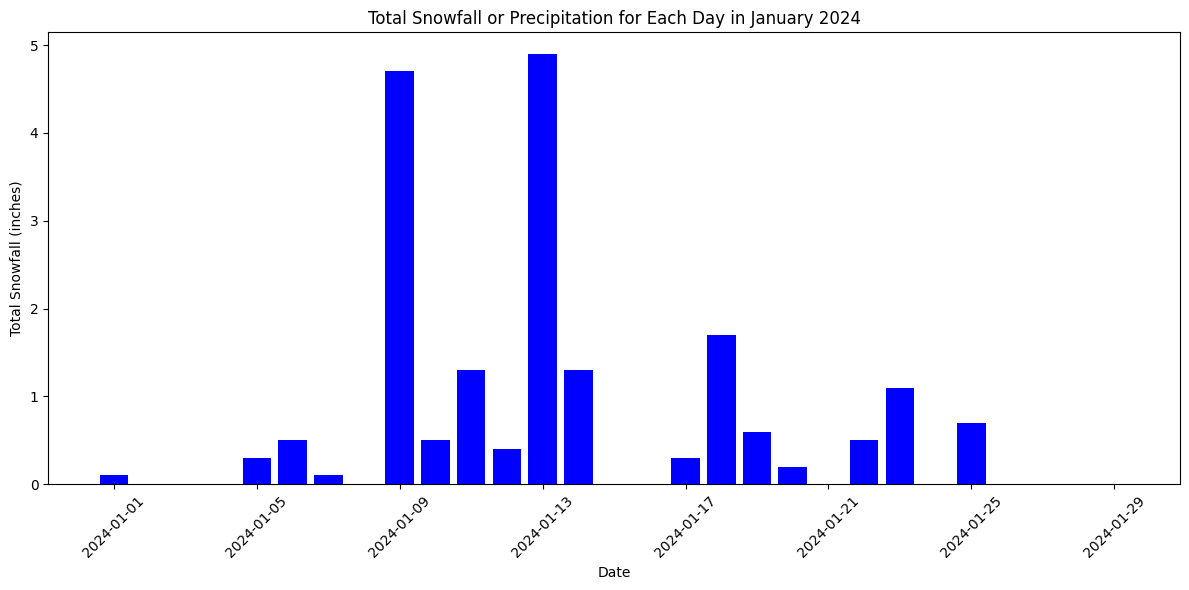

In [ ]:
january_2024_data = missing_data_with_weather[(missing_data_with_weather['Date'].dt.year == 2024) & (missing_data_with_weather['Date'].dt.month == 1)]
if 'snow' in january_2024_data.columns:
    daily_data = january_2024_data.groupby(january_2024_data['Date'].dt.date)['snow'].sum()
    ylabel = 'Total Snowfall (inches)'
else:
    daily_data = january_2024_data.groupby(january_2024_data['Date'].dt.date)['precip'].sum()
    ylabel = 'Total Precipitation (mm)'
plt.figure(figsize=(12, 6))
plt.bar(daily_data.index, daily_data.values, color='blue')
plt.title('Total Snowfall or Precipitation for Each Day in January 2024')
plt.xlabel('Date')
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mse
#help from https://medium.com/@chandradip93/accuracy-score-and-mse-and-loss-function-23cabf70e2c4
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

X = merged_df2[['rain']]
y = merged_df2['num_towed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('rain_encoder', OneHotEncoder(), ['rain'])
    ],
    remainder='passthrough'
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(X_train, y_train)

coefficients = model.named_steps['classifier'].coef_
intercept = model.named_steps['classifier'].intercept_

print("Intercept:", intercept)
print("Coefficients for rain categories:", coefficients)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Intercept: [ 0.45933434  0.41878318 -0.4988747  -0.4988747   0.11628594 -0.4988747
  1.32884076 -0.23253699  0.11628594  0.76903678 -0.4988747  -0.4988747
  0.76903678  0.11628594  0.41878318 -0.4988747  -0.4988747   0.86732868
  0.11628594 -0.23253699  0.76903678 -0.4988747   0.41878318 -0.23253699
 -0.4988747  -0.4988747  -0.4988747  -0.4988747 ]
Coefficients for rain categories: [[ 0.37896279 -0.37902987]
 [-0.28967537  0.28955203]
 [ 0.17781518 -0.17784811]
 [ 0.17781518 -0.17784811]
 [ 0.2931149  -0.2931231 ]
 [ 0.17781518 -0.17784811]
 [-0.26944792  0.2697114 ]
 [-0.52913421  0.52935147]
 [ 0.2931149  -0.2931231 ]
 [-0.13557059  0.13554566]
 [ 0.17781518 -0.17784811]
 [ 0.17781518 -0.17784811]
 [-0.13557059  0.13554566]
 [ 0.2931149  -0.2931231 ]
 [-0.28967537  0.28955203]
 [ 0.17781518 -0.17784811]
 [ 0.17781518 -0.17784811]
 [-0.55261616  0.55264064]
 [ 0.2931149  -0.2931231 ]
 [-0.52913421  0.52935147]
 [-0.13557059  0.13554566]
 [ 0.17781518 -0.17784811]
 [-0.28967537  0.2895

NameError: name 'y_pred' is not defined

The high MSE means that rain is not a good predictor (at least soley) for predicting if a car is going to be towed or not.

In [ ]:
all_dates = pd.DataFrame({'date': pd.date_range(start=merged_df['Date'].min(), end=merged_df['Date'].max())})
merged_data = pd.merge(all_dates, merged_df, how='left', left_on='date', right_on='Date')
merged_data['car_towed'] = merged_data['Date'].apply(lambda x: '0' if pd.isnull(x) else '1')
merged_data.drop(columns=['Date'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)
weather_df.rename(columns={'Date': 'date'}, inplace=True)
merged_data = pd.merge(merged_data, weather_df[['date', 'precip']], how='left', on='date')

In [ ]:
merged_data.dropna(subset=['precip_x'], inplace=True)

In [ ]:
merged_data.head()

,date,plate,rain,snow2,precip_x,snow,precipitation,Month,car_towed,precip_y
0,2024-01-30,DV74082,Yes,No,0.013,0.0,True,1,True,0.013
1,2024-01-30,BQ90135,Yes,No,0.013,0.0,True,1,True,0.013
2,2024-01-30,DA25215,Yes,No,0.013,0.0,True,1,True,0.013
3,2024-01-30,NaN,Yes,No,0.013,0.0,True,1,True,0.013
4,2024-01-30,NaN,Yes,No,0.013,0.0,True,1,True,0.013


Correlation Coefficient: nan


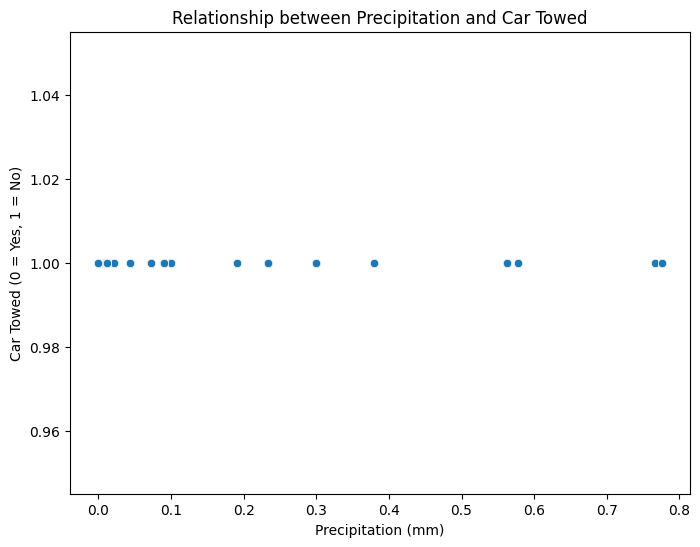

Initially, I had chosen to do my project on the sex offenders database from the Chicago Data Portal. I liked this dataset because it was unique compared to anything I had done before and it is something I am interested in. After milestone 3, I had to pivot to a different dataset as the requirements for milestone 4 required mapping another dataset to the dataframe. The sex offenders database did not provide this opportunity, so I switched to using the towed vehicles database, also from the Chicago Data Portal. The second dataset I chose to map to the towed vehicles dataset was a weather dataset.

The goal of the code, after mapping the towed vehicles dataset and the weather dataset together, was to find out if there was a correlation between precipitation and a car being towed. The Chicago weather dataset provides the amount of precipitation in mm for each day. I coded it so that the dataframe also included a column indicating whether it had rained or not.

The first part of the analysis I conducted found the number of days where a car was towed and it also rained. From January 2024 to March 2024, 36.23% of days where a car was towed had some precipitation. I also did the same for snow, which was 10.14%. Next, I visualized the number of cars towed on days where it had rained or snowed and on days where it had not. I made three graphs: one for rain, one for snow, and one for rain and snow. All of these graphs showed fewer days with precipitation compared to days without. Next, I visualized the number of days where it was rainy or snowy and a car was towed. From my findings, the proportion of days where it was rainy and a car was towed to days where it was not rainy, and the count of cars towed on rainy days vs. not rainy days are about equal.

Next, I found the month that had the most vehicles towed, which is March. After that, I visualized the precipitation in mm for the month of March. The graph showed 12 days where it rained, and the peak precipitation was 25 mm. Following that, I did the same thing for the month with the least amount of cars towed, which was January. January had very few rainy days, and a peak precipitation of 0.7 mm. Then I found the days in January where a car was not towed and graphed the precipitation for those days. There were a total of 17 days of precipitation with a peak of 5 mm. From these graphs, I discovered that for January, there was more precipitation on days where a car was not towed than when a car was towed.

Going forward, there are a few things I would like to do. First, I was unable to implement an API for the weather dataset, so I was limited to how much data I could load into Python. In the future, I would like to be able to figure this out so that I can have a wider array of data instead of just a few months' worth. Secondly, I would like to delve further into correlation. I want to create a correlation matrix and graph the correlation between the precipitation in mm and whether a car was towed that day or not. Since I only have a few months of data, I did not feel confident in the correlation graph, so it was not included in the final report.

From the code and analysis, it does not seem that there is a correlation between rain and cars being towed in Chicago. I thought that there would be fewer cars towed on rainy or snowy days because it causes more of a hassle, but my findings proved that wrong. The proportion of cars towed on rainy days vs. cars towed on non-rainy days is nearly equal, which concludes that there is not a strong correlation between rain and a vehicle being towed.
